In [1]:
import matplotlib.pyplot as plt
from pprint import pprint as pp
import numpy as np
import pandas as pd

feature_matrix = []
target_vector1 = []
target_vector2 = []
varToNumNA = dict()

for line in open('CommViolPredUnnormalizedData.txt', 'r'):
    features_orig = line.strip().split(',')
    for i in range(len(features_orig)):
        if features_orig[i] == '?':
            try:
                varToNumNA[i] += 1
            except:
                varToNumNA[i] = 1
    
    target1 = features_orig[-2] # ViolentCrimesPerPop
    target2 = features_orig[-1] # nonViolPerPop
    #features = [ f for f in features[3:-2]] # don't include town and state name
    features = [ f for f in features_orig[67:98] ] 
    feature_matrix.append(features)
    target_vector1.append(target1)
    target_vector2.append(target2)
  

In [2]:
from sklearn.metrics import *
import numpy as np

# http://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
def statistical_measures(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return {'TPR':TPR, 'TNR':TNR, 'PPV':PPV, 'NPV':NPV, 'FPR':FPR, 'FNR':FNR, 'FDR':FDR, 'ACC':ACC}

In [3]:
# don't use the variables that have a lot of '?'s in th data
varToNumNA # {var : numNA}, var is the index of the variable, numNA is the nubmer of ?s

{2: 1221,
 3: 1224,
 30: 1,
 103: 1872,
 104: 1872,
 105: 1872,
 106: 1872,
 107: 1872,
 108: 1872,
 109: 1872,
 110: 1872,
 111: 1872,
 112: 1872,
 113: 1872,
 114: 1872,
 115: 1872,
 116: 1872,
 117: 1872,
 118: 1872,
 119: 1872,
 123: 1872,
 124: 1872,
 125: 1872,
 126: 1872,
 128: 1872,
 131: 208,
 132: 208,
 133: 1,
 134: 1,
 135: 13,
 136: 13,
 137: 3,
 138: 3,
 139: 3,
 140: 3,
 141: 3,
 142: 3,
 143: 91,
 144: 91,
 145: 221,
 146: 97}

In [4]:
len(features)

31

In [5]:
feature_matrix[1]
'?' in feature_matrix[1]

False

In [6]:
feature_matrix_clean = []
target_vector1_clean = []
target_vector2_clean = []
for i in range(len(feature_matrix)):
    if ('?' not in feature_matrix[i] and '?' not in target_vector1[i] and '?' not in target_vector2[i]):
        feature_matrix_clean.append([float(x) for x in feature_matrix[i]])
        target_vector1_clean.append(float(target_vector1[i]))
        target_vector2_clean.append(float(target_vector2[i]))

In [7]:
len(feature_matrix), len(feature_matrix_clean) # get rid of some data ~300

(2215, 1902)

In [8]:
AVG_CRIME = 636.6

In [9]:
data = np.array( feature_matrix_clean )
target1 = np.array( [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean] )
target2 = np.array( [ (1 if (x > AVG_CRIME) else 0) for x in target_vector2_clean] )

print(data)
print(target1)

[[  4.81   4.17   2.99 ...,  14.    11.     0.  ]
 [  4.25   3.34   2.7  ...,  12.5    0.     0.  ]
 [  2.97   2.05   2.42 ...,  11.6   16.     0.  ]
 ..., 
 [  5.1    3.5    2.44 ...,  13.1   44.     0.  ]
 [  9.83   7.1    2.84 ...,  14.1    0.     0.  ]
 [  8.58   5.7    2.58 ...,  11.6   10.     2.  ]]
[0 0 0 ..., 0 1 1]


In [10]:
# We will use a variation of NB 
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
X_train, y_train1 = data, target1 
model.fit(X_train, y_train1)

GaussianNB(priors=None)

In [11]:
y_predicted = model.predict(X_train) 
y_expected = y_train1

In [12]:
# Import  metrics
from sklearn import metrics

# summarize the fit of the model

print(metrics.accuracy_score(y_expected, y_predicted))
print()
print(metrics.classification_report(y_expected, y_predicted))
print(metrics.confusion_matrix(y_expected, y_predicted))
print()

0.773922187171

             precision    recall  f1-score   support

          0       0.77      0.96      0.85      1306
          1       0.80      0.37      0.51       596

avg / total       0.78      0.77      0.75      1902

[[1249   57]
 [ 373  223]]



In [13]:
def readFile(filename, mode="rt"):
    # rt stands for "read text"
    fin = contents = None
    try:
        fin = open(filename, mode)
        contents = fin.read()
    finally:
        if (fin != None): fin.close()
    return contents

#def indexToName(i):
#    contents = readFile('varNames.txt')
#    contents_list = contents.split('\n')
#    contents_list = [ (s.split())[1][:-1] for s in contents_list ]
#    return contents_list[i]

# get all of the variable names
contents = readFile('varNames.txt')
contents_list = contents.split('\n')
contents_list = [ (s.split())[1][:-1] for s in contents_list ]
#contents_list.index('population')

In [14]:
varNames = []
for i in varToNumNA:
    varNames += [(i, varToNumNA[i], contents_list[i])]
sorted(varNames) # variables that we didn't use: (index, # of times used, var name)

[(2, 1221, 'countyCode'),
 (3, 1224, 'communityCode'),
 (30, 1, 'OtherPerCap'),
 (103, 1872, 'LemasSwornFT'),
 (104, 1872, 'LemasSwFTPerPop'),
 (105, 1872, 'LemasSwFTFieldOps'),
 (106, 1872, 'LemasSwFTFieldPerPop'),
 (107, 1872, 'LemasTotalReq'),
 (108, 1872, 'LemasTotReqPerPop'),
 (109, 1872, 'PolicReqPerOffic'),
 (110, 1872, 'PolicPerPop'),
 (111, 1872, 'RacialMatchCommPol'),
 (112, 1872, 'PctPolicWhite'),
 (113, 1872, 'PctPolicBlack'),
 (114, 1872, 'PctPolicHisp'),
 (115, 1872, 'PctPolicAsian'),
 (116, 1872, 'PctPolicMinor'),
 (117, 1872, 'OfficAssgnDrugUnits'),
 (118, 1872, 'NumKindsDrugsSeiz'),
 (119, 1872, 'PolicAveOTWorked'),
 (123, 1872, 'PolicCars'),
 (124, 1872, 'PolicOperBudg'),
 (125, 1872, 'LemasPctPolicOnPatr'),
 (126, 1872, 'LemasGangUnitDeploy'),
 (128, 1872, 'PolicBudgPerPop'),
 (131, 208, 'rapes'),
 (132, 208, 'rapesPerPop'),
 (133, 1, 'robberies'),
 (134, 1, 'robbbPerPop'),
 (135, 13, 'assaults'),
 (136, 13, 'assaultPerPop'),
 (137, 3, 'burglaries'),
 (138, 3, 'burgl

In [15]:
from sklearn import linear_model, datasets
# use logistic reg and L1 penalty 
logreg = linear_model.LogisticRegression(C=1e5, penalty='l1',)
X = feature_matrix_clean
y = [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean]
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_predicted_log = logreg.predict(X)
y_expected = y_train1
print(metrics.accuracy_score(y_expected, y_predicted_log))
print()
print(metrics.classification_report(y_expected, y_predicted_log))
print(metrics.confusion_matrix(y_expected, y_predicted_log))
print()

0.84752891693

             precision    recall  f1-score   support

          0       0.86      0.92      0.89      1306
          1       0.80      0.68      0.74       596

avg / total       0.84      0.85      0.84      1902

[[1205  101]
 [ 189  407]]



In [17]:
# logistic regression w/ L1 penalty and CV
from sklearn import cross_validation
predicted = cross_validation.cross_val_predict(linear_model.LogisticRegression(penalty='l1'), X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

C:\Users\chang\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.840694006309
             precision    recall  f1-score   support

          0       0.86      0.92      0.89      1306
          1       0.79      0.68      0.73       596

avg / total       0.84      0.84      0.84      1902



In [18]:
# l1 log reg, CV
cm2 = confusion_matrix(y, predicted)
statistical_measures(cm2)

{'ACC': array([ 0.84069401,  0.84069401]),
 'FDR': array([ 0.13894888,  0.21442495]),
 'FNR': array([ 0.08422665,  0.3238255 ]),
 'FPR': array([ 0.3238255 ,  0.08422665]),
 'NPV': array([ 0.78557505,  0.86105112]),
 'PPV': array([ 0.86105112,  0.78557505]),
 'TNR': array([ 0.6761745 ,  0.91577335]),
 'TPR': array([ 0.91577335,  0.6761745 ])}

In [19]:
# use logistic reg and L2 penalty 
logreg2 = linear_model.LogisticRegression(C=1e5, penalty='l2',)
logreg2.fit(X, y)

y_predicted_log2 = logreg2.predict(X)
print(metrics.accuracy_score(y_expected, y_predicted_log2))
print()
print(metrics.classification_report(y_expected, y_predicted_log2))
print(metrics.confusion_matrix(y_expected, y_predicted_log2))
print()

0.813880126183

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1306
          1       0.78      0.57      0.66       596

avg / total       0.81      0.81      0.80      1902

[[1211   95]
 [ 259  337]]



In [20]:
predicted2 = cross_validation.cross_val_predict(linear_model.LogisticRegression(penalty='l2'), X, y, cv=10)
print(metrics.accuracy_score(y, predicted2))
print(metrics.classification_report(y, predicted2))

0.832281808623
             precision    recall  f1-score   support

          0       0.85      0.92      0.88      1306
          1       0.78      0.64      0.71       596

avg / total       0.83      0.83      0.83      1902



In [21]:
# l2 log reg, CV
cm3 = confusion_matrix(y, predicted2)
statistical_measures(cm3)

{'ACC': array([ 0.83228181,  0.83228181]),
 'FDR': array([ 0.15123675,  0.21560575]),
 'FNR': array([ 0.08039816,  0.3590604 ]),
 'FPR': array([ 0.3590604 ,  0.08039816]),
 'NPV': array([ 0.78439425,  0.84876325]),
 'PPV': array([ 0.84876325,  0.78439425]),
 'TNR': array([ 0.6409396 ,  0.91960184]),
 'TPR': array([ 0.91960184,  0.6409396 ])}

In [22]:
# now try what we did in class on 5/2 (random forest and confusion matrix to analyze)
df = pd.read_csv('CommViolPredUnnormalizedData.txt', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [23]:
df.columns = contents_list # add headers with correct variable names
df.head(5)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [24]:
onlyVarNames = [ v[2] for v in varNames ] # get the variables that we don't use bc they have too many NAs

In [27]:
df2 = df.drop(onlyVarNames+['communityname', 'state'], axis=1) # drop vars that have a lot of NAs
df2 = df2.drop(['fold'], axis=1)
df2 = df2.ix[:,61:92]
df.shape, df2.shape

((2215, 147), (2215, 31))

In [29]:
df2.head(10)

,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,...,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet
0,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,...,685,1001,1001,316,1001,23.8,21.1,14.0,11,0
1,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,...,467,560,672,205,627,27.6,20.7,12.5,0,0
2,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,...,370,428,520,150,484,24.1,21.7,11.6,16,0
3,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,...,195,250,309,114,333,28.7,20.6,14.5,0,0
4,5.23,3.11,2.35,2.55,2.12,58.13,2.94,55.64,2,333,...,202,283,362,160,332,32.2,23.2,12.9,2,0
5,3.08,1.92,2.28,2.37,2.16,57.81,2.11,53.19,2,5119,...,215,280,349,134,340,26.4,17.3,11.7,327,4
6,5.08,3.46,2.55,2.89,2.09,64.62,1.47,47.35,3,566,...,463,669,824,361,736,24.4,20.8,12.5,0,0
7,3.85,2.55,2.36,2.42,2.27,65.29,1.90,56.30,2,2051,...,186,253,325,139,338,26.3,15.1,12.2,21,0
8,2.59,1.54,2.32,2.77,1.91,57.42,1.67,59.32,2,1562,...,241,321,387,146,355,25.2,20.7,12.8,125,15
9,6.70,4.10,2.45,2.47,2.44,46.82,6.14,59.96,2,5606,...,192,281,369,177,353,29.6,19.4,13.0,43,4


In [30]:
# double check that there are no '?'s (NAs)
df2 = df2.replace('?', np.nan)
df2 = df2.dropna(axis=0)
df2.shape

(2215, 31)

In [31]:
X = df2[df.ViolentCrimesPerPop != '?'] # didn't get rid of '?' in the y (ViolentCrimesPerPop) yet
y = df.ViolentCrimesPerPop[df.ViolentCrimesPerPop != '?']
y = pd.Series([float(a) > AVG_CRIME for a in y ]) # make the y 0 or 1
X.shape, y.shape

((1994, 31), (1994,))

In [32]:
# X.dtypes # check that datatypes are numbers

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=364)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 31), (399, 31), (1595,), (399,))

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
predicted_rf = clf.predict(X_test)

In [37]:
# random forest 
cm1 = confusion_matrix(y_test, predicted_rf)

In [38]:
statistical_measures(cm1)

{'ACC': array([ 0.84711779,  0.84711779]),
 'FDR': array([ 0.12056738,  0.23076923]),
 'FNR': array([ 0.09818182,  0.27419355]),
 'FPR': array([ 0.27419355,  0.09818182]),
 'NPV': array([ 0.76923077,  0.87943262]),
 'PPV': array([ 0.87943262,  0.76923077]),
 'TNR': array([ 0.72580645,  0.90181818]),
 'TPR': array([ 0.90181818,  0.72580645])}

C:\Users\chang\Miniconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Feature ranking:
1. feature 15 PctHousNoPhone (0.075103)
2. feature 5 PctPersOwnOccup (0.064664)
3. feature 6 PctPersDenseHous (0.053841)
4. feature 0 PctLargHouseFam (0.048905)
5. feature 12 PctVacantBoarded (0.048340)
6. feature 11 PctHousOwnOcc (0.046531)
7. feature 7 PctHousLess3BR (0.041730)
8. feature 1 PctLargHouseOccup (0.038680)
9. feature 9 HousVacant (0.038332)
10. feature 26 MedRentPctHousInc (0.037250)


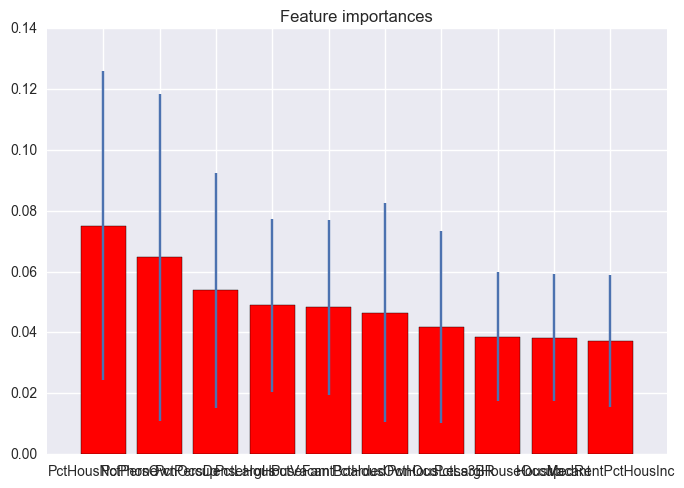

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

#X_arr = feature_matrix_clean
#y_arr = [ (1 if (x > AVG_CRIME) else 0) for x in target_vector1_clean]
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#num_attributes = len(X_arr[0])
top_x = 10 # just get top 10
for f in range(top_x):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], df2.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_x), importances[indices[:top_x]],
       color="r", yerr=std[indices[:top_x]], align="center")
plt.xticks(range(top_x), [df2.columns[indices[i]] for i in range(top_x)])
plt.xlim([-1, top_x])
plt.show()

In [40]:
# random forest w/ CV
predicted_rf_cv = cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=20), X, y, cv=10)
print(metrics.accuracy_score(y, predicted_rf_cv))
print(metrics.classification_report(y, predicted_rf_cv))

0.839017051153
             precision    recall  f1-score   support

      False       0.86      0.91      0.89      1362
       True       0.78      0.68      0.73       632

avg / total       0.84      0.84      0.84      1994



In [41]:
cm1b = confusion_matrix(y, predicted_rf_cv)
statistical_measures(cm1b)

{'ACC': array([ 0.83901705,  0.83901705]),
 'FDR': array([ 0.13929314,  0.21778584]),
 'FNR': array([ 0.08810573,  0.31803797]),
 'FPR': array([ 0.31803797,  0.08810573]),
 'NPV': array([ 0.78221416,  0.86070686]),
 'PPV': array([ 0.86070686,  0.78221416]),
 'TNR': array([ 0.68196203,  0.91189427]),
 'TPR': array([ 0.91189427,  0.68196203])}

In [42]:
def cm_analysis(confusion_matrix):
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return {'true positive':TPR, 'true negative':TNR, 'precision':PPV, 'negative predictive val':NPV, 'false positive':FPR, 'false negative':FNR, 'false discovery':FDR, 'Accuracy':ACC}

In [43]:
cm_analysis(cm2)

{'Accuracy': 0.84069400630914826,
 'false discovery': 0.21442495126705652,
 'false negative': 0.3238255033557047,
 'false positive': 0.084226646248085763,
 'negative predictive val': 0.86105111591072714,
 'precision': 0.78557504873294348,
 'true negative': 0.91577335375191427,
 'true positive': 0.6761744966442953}

In [44]:
statistical_measures(cm2)

{'ACC': array([ 0.84069401,  0.84069401]),
 'FDR': array([ 0.13894888,  0.21442495]),
 'FNR': array([ 0.08422665,  0.3238255 ]),
 'FPR': array([ 0.3238255 ,  0.08422665]),
 'NPV': array([ 0.78557505,  0.86105112]),
 'PPV': array([ 0.86105112,  0.78557505]),
 'TNR': array([ 0.6761745 ,  0.91577335]),
 'TPR': array([ 0.91577335,  0.6761745 ])}